<h1 style="font-size:400%;
    font-family:Georgia,serif;
	color:#4E443C;
	font-variant: small-caps; text-transform: none; font-weight: 100; margin-bottom: 0;" align="center"> Artist Emotional Profile </h1>
    
<h1 style="font-family:Georgia,serif;
	color:#4E443C;
	font-variant: small; text-transform: none; font-weight: 100; margin-bottom: 0;" align="center"> Analyzing the song lyrics of music artists to determine their emotional profiles based on the eight primary human emotions proposed by Robert Plutchik (wheel of emotions). </h1>
    
--------

## **Table of Contents**
* [Background and Purpose](#Background,-Purpose-and-Methodology)
* [1. Data Collection](#1.-Data-Collection)
* [2. Data Cleaning and Enrichment](#2.-Initial-Data-Cleaning-and-Enrichment)
* [3. Text Processing](#3.-Text-Processing-(NLP))
* [4. Sentiment Analysis](#4.-Sentiment-Analysis)
* [5. Data Visualization](#5.-Data-visualization)

## Background, Purpose and Methodology

In this project, I collect and explore song lyrics from music artists with a focus on primary human emotions based on Plutchik's wheel of emotions. The purpose of the project is to explore ways of visualizing an artist's "emotional profile". 

**Methodology:**
- EDA: Various visualization methods using Matplotlib.
- Sentiment Analysis: Using NRC's emotional lexicon.

This project was created on May 24, 2020


### **How was the data acquired?**
The Data was acquired through Genius.com's official API as well as the the lyricsgenius API.

# 1. Data Collection

In [9]:
# General Libraries
import pandas as pd
import numpy as np

# Visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Install TQDM progress bar
from tqdm.notebook import tqdm

In [19]:
'''
This class downloads a given artist's lyrics from www.genius.com using the lyricsgenius API.
Note this can be a time consuming task depending on the number of songs to be downloaded.

'''

import lyricsgenius as genius

class download_artist():
    """
    This class includes all necessary functions to download the artist data using lyricsgenius
    """    
    def __init__(self):
        pass
    
    # Connect to the Genius API
    def create_connection(self):
        geniusCreds = "LYYhMTHPBDhUvdtB5_DoVTz2StRGr53dz2fLMs2H50uygB4v8iTyoW_xZP95m0dD"
        self.api = genius.Genius(geniusCreds, remove_section_headers=True, excluded_terms=['(Remix)', '(Live)'])
    
    # Download lyrics into a pandas dataframe and save backup JSON.
    def download_lyrics(self, artist_name, number_songs):
        df = pd.DataFrame(columns=['Title', 'Artist', 'Date','Lyrics'])
        artist = self.api.search_artist(artist_name, max_songs=number_songs)
        for song in artist.songs:
            df = df.append({'Title': song.title, 'Artist': song.artist , 'Date': song.year, 'Lyrics': song.lyrics}, ignore_index=True)
            print(df)
        # Create backup JSON file
        artist.save_lyrics()
        return df
    
    # The Main function
    def download_artist(self, artist, number_songs = None):
        self.create_connection()
        dataset = self.download_lyrics(artist, number_songs)
        return dataset

In [ ]:
# Create downloader object
downloader = download_artist()

# Download the data for the given artist
artist_name = "Drake"
number_songs = None  # None is all songs
artist_dataset = downloader.download_artist(artist_name, number_songs)

**I'm skipping above download process since I have downloaded the dataset before and saved it into a JSON file. Below, I use the JSON file to import the dataset to save time.**

In [21]:
# Download Drake Backup Dataset
import json

with open("Lyrics_Drake.json") as f:
  drake_dataset_raw = json.load(f)

# 2. Initial Data Cleaning and Enrichment

In [28]:
drake_dataset_raw.keys()

dict_keys(['alternate_names', 'api_path', 'description', 'facebook_name', 'followers_count', 'header_image_url', 'id', 'image_url', 'instagram_name', 'is_meme_verified', 'is_verified', 'name', 'translation_artist', 'twitter_name', 'url', 'current_user_metadata', 'description_annotation', 'user', 'songs'])

In [24]:
# Number of Drake songs downloaded 
len(drake_dataset_raw["songs"])

425

In [25]:
# Features within the raw Drake dataset
drake_dataset_raw["songs"][1].keys()

dict_keys(['annotation_count', 'api_path', 'apple_music_id', 'apple_music_player_url', 'description', 'embed_content', 'featured_video', 'full_title', 'header_image_thumbnail_url', 'header_image_url', 'id', 'lyrics_owner_id', 'lyrics_placeholder_reason', 'lyrics_state', 'path', 'pyongs_count', 'recording_location', 'release_date', 'release_date_for_display', 'song_art_image_thumbnail_url', 'song_art_image_url', 'stats', 'title', 'title_with_featured', 'url', 'current_user_metadata', 'album', 'custom_performances', 'description_annotation', 'featured_artists', 'lyrics_marked_complete_by', 'media', 'primary_artist', 'producer_artists', 'song_relationships', 'verified_annotations_by', 'verified_contributors', 'verified_lyrics_by', 'writer_artists', 'lyrics'])

In [30]:
drake_dataset_raw["songs"][1]["full_title"]

'In My Feelings by\xa0Drake'

In [31]:
drake_dataset_raw["songs"][1]["release_date"]

'2018-06-29'

In [32]:
drake_dataset_raw["songs"][1]["lyrics"]

"Trap, TrapMoneyBenny\nThis shit got me in my feelings\nGotta be real with it, yeah\n\nKiki, do you love me? Are you riding?\nSay you'll never ever leave from beside me\n'Cause I want ya, and I need ya\nAnd I'm down for you always\nKB, do you love me? Are you riding?\nSay you'll never ever leave from beside me\n'Cause I want ya, and I need ya\nAnd I'm down for you always\n\nLook, the new me is really still the real me\nI swear you gotta feel me before they try and kill me\nThey gotta make some choices, they runnin' out of options\n'Cause I've been goin' off and they don't know when it's stoppin'\nAnd when you get to toppin', I see that you've been learnin'\nAnd when you get to shoppin', you spend it like you earned it\nAnd when you popped off on your ex he deserved it\nI thought you were the one from the jump that confirmed it\nTrapMoneyBenny\nI buy you Champagne but you love some Henny\nFrom the block like you Jenny\nI know you special, girl, 'cause I know too many\n\n'Resha, do you l

In [33]:
# Taking a closer look at a song's album feature.
drake_dataset_raw["songs"][1]["album"]

{'api_path': '/albums/420582',
 'cover_art_url': 'https://images.genius.com/5c677b7bfc2f696abf2e2d928301bb44.1000x1000x1.jpg',
 'full_title': 'Scorpion by Drake',
 'id': 420582,
 'name': 'Scorpion',
 'url': 'https://genius.com/albums/Drake/Scorpion',
 'artist': {'api_path': '/artists/130',
  'header_image_url': 'https://images.genius.com/df1fb638e8955739be4ea33269d4ab3b.1000x513x10.gif',
  'id': 130,
  'image_url': 'https://images.genius.com/b8a586bba090504aac375cd2d84c1d03.169x169x1.jpg',
  'is_meme_verified': False,
  'is_verified': False,
  'name': 'Drake',
  'url': 'https://genius.com/artists/Drake'}}

In [34]:
# This function converts a date in string format into a datetime format.
from datetime import datetime

class date_converter():
    def __init__(self):
        None
    
    def convert(self, s):
        if s is None:
            return 0
        else:
            dt = datetime.strptime(s, '%Y-%m-%d')
            return dt.year

In [35]:
'''
Creating a Pandas dataframe (drake_dataset_loc) with chosen features 
and converting converting the date into a datetime format.
'''
chosen_features = ['album', 'song', 'release_year', 'lyrics']
drake_dataset_loc = pd.DataFrame(columns=chosen_features)
dc = date_converter()

for song in drake_dataset_raw["songs"]:
    drake_dataset_loc = drake_dataset_loc.append({'song': song["title"], 'release_year': int(dc.convert(song["release_date"])), 'lyrics': song["lyrics"], 'album': song["album"]}
                                             , ignore_index=True)

In [36]:
# Helper function to return album name and id from dataset
def return_album_name(album_info):
    if album_info != None:
        return album_info["name"]
    else:
        return None
    
def return_album_id(album_info):   
    if album_info != None:
        return album_info["id"]
    else:
        return None

In [37]:
# Creating a dataframe (drake_dataset_albums) that only contains songs that are in an album
drake_dataset_loc["album_id"] = drake_dataset_loc["album"].apply(lambda x: return_album_id(x))
drake_dataset_loc["album"] = drake_dataset_loc["album"].apply(lambda x: return_album_name(x))
drake_dataset_albums = drake_dataset_loc[drake_dataset_loc['album'].notna()].reset_index(drop = True)
drake_dataset_albums["album_id"] = drake_dataset_albums["album_id"].apply(lambda x: int(x))

In [39]:
drake_dataset_albums.head()

,album,song,release_year,lyrics,album_id
0,Scorpion,God’s Plan,2018,And they wishin' and wishin' and wishin' and w...,420582
1,Scorpion,In My Feelings,2018,"Trap, TrapMoneyBenny\nThis shit got me in my f...",420582
2,Views,Hotline Bling,2015,"You used to call me on my\nYou used to, you us...",132506
3,Views,One Dance,2016,"Baby, I like your style\n\nGrips on your waist...",132506
4,Nothing Was the Same,"Hold On, We’re Going Home",2013,I got my eyes on you\nYou're everything that I...,40475


In [40]:
# Overview of Dataframes
print("Number of songs in dataframe with all songs", len(drake_dataset_loc))
print("Number of songs in dataframe with album songs", len(drake_dataset_albums))
print("Number of albums:", drake_dataset_albums["album"].nunique())

Number of songs in dataframe with all songs 425
Number of songs in dataframe with album songs 268
Number of albums: 26


In [41]:
# Overview of albums
drake_dataset_albums.groupby("album").count()["song"]

album
Care Package                                             14
Comeback Season                                          23
D6*                                                      12
Dark Lane Demo Tapes                                     13
Heartbreak Drake                                         11
If You’re Reading This It’s Too Late                     19
J.U.S.T.I.C.E. For All                                    1
King Soulja II                                            1
Link Up TV Freestyles                                     1
More Life                                                23
NBA 2K16 Soundtrack                                       1
Nothing Was the Same                                     16
Room for Improvement                                     21
Scary Hours                                               1
Scorpion                                                 24
Singles & Unreleased                                      1
So Far Gone                       

In [42]:
# Removing non-album entries which contain very few songs or have unserious names.
albums_to_drop = ["D6*", "J.U.S.T.I.C.E. For All", "King Soulja II" , "Link Up TV Freestyles", "NBA 2K16 Soundtrack", "Scary Hours", "Singles & Unreleased", "So Far Gone (EP)", "The Best in the World Pack", "Top Boy (A Selection of Music Inspired by the Series)", "What a Time To Be Alive", "Young Money: Rise Of An Empire"]
drake_dataset_albums = drake_dataset_albums[~drake_dataset_albums["album"].isin(albums_to_drop)].reset_index(drop = True)

In [43]:
# Drake Albums, cleaned
drake_dataset_albums.groupby("album").count()["song"]

album
Care Package                            14
Comeback Season                         23
Dark Lane Demo Tapes                    13
Heartbreak Drake                        11
If You’re Reading This It’s Too Late    19
More Life                               23
Nothing Was the Same                    16
Room for Improvement                    21
Scorpion                                24
So Far Gone                             18
Take Care                               20
Thank Me Later                          15
Views                                   20
Young Sweet Jones 2                      6
Name: song, dtype: int64

In [50]:
# Import your official genius API credentials
with open("genius_api_credentials.json") as f:
  genius_api_credentials = json.load(f)

In [51]:
# Creating a class to retrieve further information about albums from the official genius api.
import requests 

class album_info():
    """
    This class includes methods to get album information
    """
    
    def __init__(self):
        self.p = {'access_token' : genius_api_credentials["api_credentials"]}           
    
    def album_year(self, album_id):
        URL = "https://api.genius.com/albums/{}".format(album_id)
        with requests.get(url = URL, params = self.p) as response:
            reponse = response.json()
            year = reponse["response"]["album"]["release_date_components"]["year"]
        return int(year)
            
    def track_info(self, album_id):
        album_tracks = {}
        URL = "https://api.genius.com/albums/{}/tracks".format(album_id)
        with requests.get(url = URL, params = self.p) as response:
            response = response.json()
            for track in response["response"]["tracks"]:
                album_tracks[track["song"]["title"]] = track["number"]
        return album_tracks
    
    def track_number(self, album_info, album_id, song_name):
        return album_info[album_id]["album_tracks"][song_name]    

In [117]:
# Creating dataset with album year and tracks
a = album_info()
album_data = {}

# Getting album data for all albums in dataset
for album_id in drake_dataset_albums["album_id"].unique():
    print(album_id)
    album_data[album_id] = {"album_year": a.album_year(album_id),
                           "album_tracks": a.track_info(album_id)}

420582
132506
40475
119674
286515
10787
549691
2627
630537
2630
359632
2622
348688
2625


In [118]:
# Looking into one of the albums as an example
album_data[2625]

{'album_year': 2006,
 'album_tracks': {'Intro (Room For Improvement)': 1,
  'Pianist Hands': 2,
  'Special': 3,
  'Do What You Do': 4,
  'Money (Remix)': 5,
  'AM 2 PM': 6,
  'City Is Mine': 7,
  'Drake’s Voice Mail Box #1': 8,
  'Bad Meaning Good': 9,
  'Thrill Is Gone': 10,
  'Make Things Right': 11,
  'Video Girl': 12,
  'Drake’s Voice Mail Box #2': 13,
  'Come Winter': 14,
  'Extra Special': 15,
  'About the Game': 16,
  'All This Love': 17,
  'Drake’s Voice Mail Box #3': 18,
  'A Scorpio’s Mind': 19,
  'S.T.R.E.S.S.': 20,
  'Try Harder': 21,
  'Kick, Push (Remix)': 22,
  'U.P.A. (Outro)': 23}}

In [119]:
# Enriching the initial Drake dataset with the additional album information (album year and track ID)
drake_dataset_albums["album_year"] = ""
drake_dataset_albums["track_id"] = ""

for album_id in drake_dataset_albums["album_id"].unique():
    drake_dataset_albums.loc[drake_dataset_albums["album_id"] == album_id, [
        'album_year']] = album_data[album_id]["album_year"]

    for song in drake_dataset_albums.loc[drake_dataset_albums['album_id'] == album_id]["song"]:
        try:
            drake_dataset_albums.loc[drake_dataset_albums['song'] == song, [
            "track_id"]] = album_data[album_id]["album_tracks"][song]
        except:
            print("Error in album", album_id, "and song", song)

Error in album 420582 and song Can’t Take A Joke
Error in album 549691 and song Can I?
Error in album 2627 and song Lust For Life
Error in album 2622 and song Closer
Error in album 2622 and song Teach U A Lesson (Freestyle)
Error in album 2625 and song City is Mine


In [120]:
# Correcting song names so that they match the initial dataset 
album_data[549691]["album_tracks"]["Can I?"] = album_data[549691]["album_tracks"]["Can I"]
del album_data[549691]["album_tracks"]["Can I"]

album_data[420582]["album_tracks"]["Can’t Take A Joke"] = album_data[420582]["album_tracks"]["Can’t Take a Joke"]
del album_data[420582]["album_tracks"]["Can’t Take a Joke"]

album_data[2627]["album_tracks"]["Lust For Life"] = album_data[2627]["album_tracks"]["Lust for Life"]
del album_data[2627]["album_tracks"]["Lust for Life"]

album_data[2622]["album_tracks"]["Closer"] = album_data[2622]["album_tracks"]["Closer to My Dreams"]
del album_data[2622]["album_tracks"]["Closer to My Dreams"]

album_data[2622]["album_tracks"]["Teach U A Lesson (Freestyle)"] = album_data[2622]["album_tracks"]["Teach U a Lesson (Freestyle)"]
del album_data[2622]["album_tracks"]["Teach U a Lesson (Freestyle)"]

album_data[2625]["album_tracks"]["City is Mine"] = album_data[2625]["album_tracks"]["City Is Mine"]
del album_data[2625]["album_tracks"]["City Is Mine"]


In [121]:
# Enriching the initial Drake dataset with the additional album information (album year and track ID)
drake_dataset_albums["album_year"] = ""
drake_dataset_albums["track_id"] = ""

for album_id in drake_dataset_albums["album_id"].unique():
    drake_dataset_albums.loc[drake_dataset_albums["album_id"] == album_id, [
        'album_year']] = album_data[album_id]["album_year"]

    for song in drake_dataset_albums.loc[drake_dataset_albums['album_id'] == album_id]["song"]:
        try:
            drake_dataset_albums.loc[drake_dataset_albums['song'] == song, [
            "track_id"]] = album_data[album_id]["album_tracks"][song]
        except:
            print("Error in album", album_id, "and song", song)

In [122]:
# Complete dataset with album years and track ids
drake_dataset_albums.head()

,album,song,release_year,lyrics,album_id,album_year,track_id
0,Scorpion,God’s Plan,2018,And they wishin' and wishin' and wishin' and w...,420582,2018,5
1,Scorpion,In My Feelings,2018,"Trap, TrapMoneyBenny\nThis shit got me in my f...",420582,2018,21
2,Views,Hotline Bling,2015,"You used to call me on my\nYou used to, you us...",132506,2016,20
3,Views,One Dance,2016,"Baby, I like your style\n\nGrips on your waist...",132506,2016,12
4,Nothing Was the Same,"Hold On, We’re Going Home",2013,I got my eyes on you\nYou're everything that I...,40475,2013,8


In [123]:
# Sort songs in chronological and correct order
drake_dataset = drake_dataset_albums.sort_values(by=["album_year","album","track_id"]).reset_index(drop = True)

In [124]:
drake_dataset.head()

,album,song,release_year,lyrics,album_id,album_year,track_id
0,Room for Improvement,Intro (Room For Improvement),2006,"Yo, what's going on? This is Drake\nAnd I'ma l...",2625,2006,1
1,Room for Improvement,Pianist Hands,2006,Thank you Ms. Graham for coming today. You loo...,2625,2006,2
2,Room for Improvement,Special,2006,"Uh yeah man, VO\nBack again like we never left...",2625,2006,3
3,Room for Improvement,Do What You Do,2006,"Stance on lean, leg up on the wall\nMy niggas ...",2625,2006,4
4,Room for Improvement,AM 2 PM,2006,"Yo I wake up every morning, shower, gather my ...",2625,2006,6


# 3. Text Processing (NLP)

In [125]:
# Import libraries for text processing
import copy
import re, string, unicodedata
import nltk
nltk.download('punkt')
import contractions
from collections import Counter
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords,wordnet
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
import contractions
import string

[nltk_data] Downloading package punkt to /Users/kaya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/kaya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/kaya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kaya/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [126]:
# This class processes the text
class TextProcessor(object):
    """
    This class includes most of the text preprocessing functions
    """

    def __init__(self):
        pass

    def toString(self, sentence):
        return str(sentence)
    # New function to remove conrol characters

    def removeCTRL(self, string):
        return re.sub(r'[\t\n\r]', ' ', string)

    def tokenizer(self, sentence):
        words = nltk.word_tokenize(sentence)
        return words

    def remove_non_ascii(self, words):
        """Remove non-ASCII characters from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = unicodedata.normalize('NFKD', word).encode(
                'ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
        return new_words

    def to_lowercase(self, words):
        """Convert all characters to lowercase from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = word.lower()
            new_words.append(new_word)
        return new_words

    def remove_punctuation(self, words):
        """Remove punctuation from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
        return new_words

    def remove_numbers(self, words):
        new_words = []
        for word in words:
            if word.isdigit() == False:
                new_words.append(word)
        return new_words

    def remove_stopwords(self, words):
        """Remove stop words from list of tokenized words"""
        new_words = []
        for word in words:
            if word not in stopwords.words('english'):
                new_words.append(word)
        return new_words

    def stem_words(self, words):
        """Stem words in list of tokenized words -- CHOOSING SNOWBALL STEMMER (LESS AGRESSIVE) INSTEAD OF LANCASTER"""
        #stemmer = LancasterStemmer()
        stemmer = SnowballStemmer("english")
        stems = []
        for word in words:
            stem = stemmer.stem(word)
            stems.append(stem)
        return stems

    def get_wordnet_pos(self, treebank_tag):
        """Convert treebank tag to wordnet pos"""
        if treebank_tag.startswith('J'):
            return wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return wordnet.VERB
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN
        elif treebank_tag.startswith('R'):
            return wordnet.ADV
        else:
            # As default pos in lemmatization is Noun
            return wordnet.NOUN

    def lemmatize_words_pos(self, words):
        """Lemmatize words with POS tags"""
        lemmatizer = WordNetLemmatizer()
        lems = []
        for word, tag in nltk.pos_tag(words):
            lem = lemmatizer.lemmatize(word, self.get_wordnet_pos(tag))
            lems.append(lem)
        return lems

    def replace_contractions(self, text):
        """Replace contractions in string of text with orignal words
            e.g., didn't -> "did not."
        """
        return contractions.fix(text)

    def remove_short(self, words):
        """Remove single character words"""
        sufficient_words = []
        for word in words:
            if len(word) > 1:
                sufficient_words.append(word)
        return sufficient_words

    # The Main Function

    def preprocess_text(self, sentence):
        sentence = self.toString(sentence)
        #sentence = self.removeCTRL(sentence)
        # Implement contractions here to not loose word meanings
        try:
            sentence = self.replace_contractions(sentence)
        except:
            print("Error on replace_contractions")
        words = self.tokenizer(sentence)
        #words = self.remove_emoji(words)
        words = self.remove_non_ascii(words)
        words = self.to_lowercase(words)
        words = self.remove_punctuation(words)
        words = self.remove_numbers(words)
        words = self.remove_stopwords(words)
        #words = self.stem_words(words)
        words = self.lemmatize_words_pos(words)
        #words = self.remove_short(words)
        return words

In [127]:
pp = TextProcessor()

In [181]:
# Testing the difference in performance between stemmer and lemmatizer
print(pp.lemmatize_words_pos(["he", "hid"]))
print(pp.stem_words(["he", "hid"]))

['he', 'hide']
['he', 'hid']


In [129]:
drake_dataset.head()

,album,song,release_year,lyrics,album_id,album_year,track_id
0,Room for Improvement,Intro (Room For Improvement),2006,"Yo, what's going on? This is Drake\nAnd I'ma l...",2625,2006,1
1,Room for Improvement,Pianist Hands,2006,Thank you Ms. Graham for coming today. You loo...,2625,2006,2
2,Room for Improvement,Special,2006,"Uh yeah man, VO\nBack again like we never left...",2625,2006,3
3,Room for Improvement,Do What You Do,2006,"Stance on lean, leg up on the wall\nMy niggas ...",2625,2006,4
4,Room for Improvement,AM 2 PM,2006,"Yo I wake up every morning, shower, gather my ...",2625,2006,6


In [130]:
# Applying text processing to the song lyrics
drake_dataset["lyrics_preprocessed"] = drake_dataset["lyrics"].apply(lambda x: pp.preprocess_text(x))

In [131]:
# Processed dataset
drake_dataset.head()

,album,song,release_year,lyrics,album_id,album_year,track_id,lyrics_preprocessed
0,Room for Improvement,Intro (Room For Improvement),2006,"Yo, what's going on? This is Drake\nAnd I'ma l...",2625,2006,1,"[yo, go, drake, ima, let, know, witness, right..."
1,Room for Improvement,Pianist Hands,2006,Thank you Ms. Graham for coming today. You loo...,2625,2006,2,"[thank, m, graham, come, today, look, nice, to..."
2,Room for Improvement,Special,2006,"Uh yeah man, VO\nBack again like we never left...",2625,2006,3,"[uh, yeah, man, vo, back, like, never, leave, ..."
3,Room for Improvement,Do What You Do,2006,"Stance on lean, leg up on the wall\nMy niggas ...",2625,2006,4,"[stance, lean, leg, wall, nigga, chill, nigga,..."
4,Room for Improvement,AM 2 PM,2006,"Yo I wake up every morning, shower, gather my ...",2625,2006,6,"[yo, wake, every, morning, shower, gather, bel..."


In [132]:
# Backing up the preprocessed dataset
drake_dataset.to_csv("drake_dataset_backup.csv")

# 4. Sentiment Analysis

In [140]:
'''
Takes a DataFrame and a specified column of text and adds 10 columns to the
DataFrame for each of the 10 emotions in the NRC Emotion Lexicon, with each
column containing the value of the text in that emotions
INPUT: DataFrame, string
OUTPUT: the original DataFrame with ten new columns
'''

import pandas as pd
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer


def text_emotion(df, column):
    new_df = df.copy()

    filepath = ("NRC-Emotion-Lexicon-Wordlevel-v0.92.txt")
    emolex_df = pd.read_csv(filepath,
                            names=["word", "emotion", "association"],
                            sep='\t')
    emolex_words = emolex_df.pivot(index='word',
                                   columns='emotion',
                                   values='association').reset_index()
    emotions = emolex_words.columns.drop('word')
    emo_df = pd.DataFrame(0, index=df.index, columns=emotions)

    stemmer = SnowballStemmer("english")

    album = ''
    song = ''

    with tqdm(total=len(list(new_df.iterrows()))) as pbar:
        for i, row in new_df.iterrows():
            pbar.update(1)
            if row['album'] != album:
                # print(row['album'])
                album = row['album']
            if row['song'] != song:
                #print('   ', row['song'])
                song = row['song']
                #chap = row['song']
            document = new_df.loc[i][column]
            #document = word_tokenize(new_df.loc[i][column])
            for word in document:
                #word = stemmer.stem(word.lower())
                emo_score = emolex_words[emolex_words.word == word]
                if not emo_score.empty:
                    for emotion in list(emotions):
                        emo_df.at[i, emotion] += emo_score[emotion]

    new_df = pd.concat([new_df, emo_df], axis=1)

    return new_df

In [138]:
# Dropping not needed columns for the sentiment analysis
drake_dataset_emotions = drake_dataset.drop(['release_year', 'lyrics', 'album_id'], 1)

In [141]:
drake_dataset_emotions.head()

,album,song,album_year,track_id,lyrics_preprocessed
0,Room for Improvement,Intro (Room For Improvement),2006,1,"[yo, go, drake, ima, let, know, witness, right..."
1,Room for Improvement,Pianist Hands,2006,2,"[thank, m, graham, come, today, look, nice, to..."
2,Room for Improvement,Special,2006,3,"[uh, yeah, man, vo, back, like, never, leave, ..."
3,Room for Improvement,Do What You Do,2006,4,"[stance, lean, leg, wall, nigga, chill, nigga,..."
4,Room for Improvement,AM 2 PM,2006,6,"[yo, wake, every, morning, shower, gather, bel..."


In [142]:
# Performing sentiment analysis on the lyrics
drake_dataset_emotions = text_emotion(drake_dataset_emotions, 'lyrics_preprocessed')

In [143]:
drake_dataset_emotions.head()

,album,song,album_year,track_id,lyrics_preprocessed,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,Room for Improvement,Intro (Room For Improvement),2006,1,"[yo, go, drake, ima, let, know, witness, right...",0,6,1,0,3,2,3,0,0,4
1,Room for Improvement,Pianist Hands,2006,2,"[thank, m, graham, come, today, look, nice, to...",0,1,0,0,5,0,10,1,3,5
2,Room for Improvement,Special,2006,3,"[uh, yeah, man, vo, back, like, never, leave, ...",7,11,11,14,39,22,65,10,4,19
3,Room for Improvement,Do What You Do,2006,4,"[stance, lean, leg, wall, nigga, chill, nigga,...",6,21,4,7,11,27,21,12,7,11
4,Room for Improvement,AM 2 PM,2006,6,"[yo, wake, every, morning, shower, gather, bel...",17,20,6,16,16,31,28,11,13,20


In [144]:
# Checking the top 5 positive songs
positive_songs = drake_dataset_emotions.sort_values(by = ['positive'], ascending=False)
positive_songs.head()

,album,song,album_year,track_id,lyrics_preprocessed,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
91,Young Sweet Jones 2,Loving You No More,2010,5,"[hard, breathe, air, call, love, ooh, nothing,...",10,9,8,15,59,22,67,13,2,9
201,Scorpion,Sandra’s Rose,2018,10,"[yeah, baby, baby, baby, baby, baby, baby, bab...",15,11,9,11,48,26,66,12,6,11
2,Room for Improvement,Special,2006,3,"[uh, yeah, man, vo, back, like, never, leave, ...",7,11,11,14,39,22,65,10,4,19
57,So Far Gone,Successful,2009,3,"[money, money, car, car, clothes, clothes, hoe...",30,48,14,17,44,26,62,14,28,52
13,Room for Improvement,Extra Special,2006,15,"[yeah, ho, drake, uh, uh, ho, dance, dance, sp...",7,16,7,6,57,19,59,9,13,23


# 5. Data visualization

In [203]:
# Adding word counts to the dataset to normalize the emotion scores
drake_dataset_emotions["word_count"] = drake_dataset_emotions["lyrics_preprocessed"].apply(len)
drake_dataset_emotions['emotion_count']= drake_dataset_emotions_test.iloc[:, 5:15].sum(axis=1)

In [204]:
drake_dataset_emotions.head()

,album,song,album_year,track_id,lyrics_preprocessed,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,word_count,hit_count,emotion_count
0,Room for Improvement,Intro (Room For Improvement),2006,1,"[yo, go, drake, ima, let, know, witness, right...",0,6,1,0,3,2,3,0,0,4,82,19,19
1,Room for Improvement,Pianist Hands,2006,2,"[thank, m, graham, come, today, look, nice, to...",0,1,0,0,5,0,10,1,3,5,76,25,25
2,Room for Improvement,Special,2006,3,"[uh, yeah, man, vo, back, like, never, leave, ...",7,11,11,14,39,22,65,10,4,19,515,202,202
3,Room for Improvement,Do What You Do,2006,4,"[stance, lean, leg, wall, nigga, chill, nigga,...",6,21,4,7,11,27,21,12,7,11,323,127,127
4,Room for Improvement,AM 2 PM,2006,6,"[yo, wake, every, morning, shower, gather, bel...",17,20,6,16,16,31,28,11,13,20,360,178,178


In [149]:
# The eight primary human emotions
emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust']

In [205]:
# Normalizing the emotion scores for each song
drake_dataset_emotions_vis = drake_dataset_emotions.copy()

for emotion in emotions:
    drake_dataset_emotions_vis[emotion] = drake_dataset_emotions_vis[emotion] / drake_dataset_emotions_vis["emotion_count"]

In [206]:
# Indexing the dataset on album and songs
drake_dataset_emotions_vis = drake_dataset_emotions_vis.set_index(['album', 'song'])
drake_dataset_emotions_vis.head()

album_year track_id  \
album                song                                                
Room for Improvement Intro (Room For Improvement)        2006        1   
                     Pianist Hands                       2006        2   
                     Special                             2006        3   
                     Do What You Do                      2006        4   
                     AM 2 PM                             2006        6   

                                                                                 lyrics_preprocessed  \
album                song                                                                              
Room for Improvement Intro (Room For Improvement)  [yo, go, drake, ima, let, know, witness, right...   
                     Pianist Hands                 [thank, m, graham, come, today, look, nice, to...   
                     Special                       [uh, yeah, man, vo, back, like, never, leave, ...   
                     Do What You Do                [stance, lean, leg, wall, nigga, chill, nigga,...   
                     AM 2 PM                       [yo, wake, every, morning, shower, gather, bel...   

                                                      anger  anticipation  \
album                song                                                   
Room for Improvement Intro (Room For Improvement)  0.000000      0.315789   
                     Pianist Hands                 0.000000      0.040000   
                     Special                       0.034653      0.054455   
                     Do What You Do                0.047244      0.165354   
                     AM 2 PM                       0.095506      0.112360   

                                                    disgust      fear  \
album                song                                               
Room for Improvement Intro (Room For Improvement)  0.052632  0.000000   
                     Pianist Hands                 0.000000  0.000000   
                     Special                       0.054455  0.069307   
                     Do What You Do                0.031496  0.055118   
                     AM 2 PM                       0.033708  0.089888   

                                                        joy  negative  \
album                song                                               
Room for Improvement Intro (Room For Improvement)  0.157895  0.105263   
                     Pianist Hands                 0.200000  0.000000   
                     Special                       0.193069  0.108911   
                     Do What You Do                0.086614  0.212598   
                     AM 2 PM                       0.089888  0.174157   

                                                   positive   sadness  \
album                song                                               
Room for Improvement Intro (Room For Improvement)  0.157895  0.000000   
                     Pianist Hands                 0.400000  0.040000   
                     Special                       0.321782  0.049505   
                     Do What You Do                0.165354  0.094488   
                     AM 2 PM                       0.157303  0.061798   

                                                   surprise     trust  \
album                song                                               
Room for Improvement Intro (Room For Improvement)  0.000000  0.210526   
                     Pianist Hands                 0.120000  0.200000   
                     Special                       0.019802  0.094059   
                     Do What You Do                0.055118  0.086614   
                     AM 2 PM                       0.073034  0.112360   

                                                   word_count  hit_count  \
album                song                                                  
Room for Improvement Intro (Room For Improvement)          82  

In [210]:
# Finding the "Care Package" album and sorting the songs by positivity ratio
drake_dataset_emotions_vis.loc["Care Package"].sort_values(by=["positive"], ascending=False).head()

,album_year,track_id,lyrics_preprocessed,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,word_count,hit_count,emotion_count
song,,,,,,,,,,,,,,,,
Can I?,2019,17,"[baby, baby, yeah, baby, baby, bring, six, rea...",0.027027,0.067568,0.040541,0.027027,0.310811,0.013514,0.378378,0.040541,0.027027,0.067568,108,74,74
Girls Love Beyoncé,2019,15,"[look, know, girl, love, beyonce, girl, love, ...",0.077670,0.106796,0.077670,0.087379,0.145631,0.155340,0.213592,0.029126,0.058252,0.048544,212,103,103
Paris Morton Music,2019,16,"[would, come, back, needed, time, caught, life...",0.095588,0.125000,0.073529,0.051471,0.110294,0.176471,0.198529,0.044118,0.044118,0.080882,238,136,136
Free Spirit,2019,13,"[tat, name, girl, know, real, tat, fuckin, nam...",0.119565,0.059783,0.086957,0.086957,0.081522,0.179348,0.195652,0.054348,0.038043,0.097826,373,184,184
Heat of the Moment,2019,14,"[school, kid, sick, book, learnin, read, anymo...",0.129870,0.038961,0.168831,0.012987,0.064935,0.181818,0.194805,0.012987,0.038961,0.155844,209,77,77


In [156]:
# Indexing for visualizations
album_indices = {}
start = 0

for album in drake_dataset_emotions["album"].unique():
    end = len(drake_dataset_emotions[drake_dataset_emotions["album"] == album])
    album_indices[album] = (start, start + end-1)
    start = start + end
    
print(album_indices)

{'Room for Improvement': (0, 20), 'Comeback Season': (21, 43), 'Heartbreak Drake': (44, 54), 'So Far Gone': (55, 72), 'Thank Me Later': (73, 87), 'Young Sweet Jones 2': (88, 93), 'Take Care': (94, 113), 'Nothing Was the Same': (114, 129), 'If You’re Reading This It’s Too Late': (130, 148), 'Views': (149, 168), 'More Life': (169, 191), 'Scorpion': (192, 215), 'Care Package': (216, 229), 'Dark Lane Demo Tapes': (230, 242)}


In [159]:
num_songs = len(drake_dataset_emotions)
print(num_songs)

243


In [160]:
# Method for calculation of a moving average given a window size
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

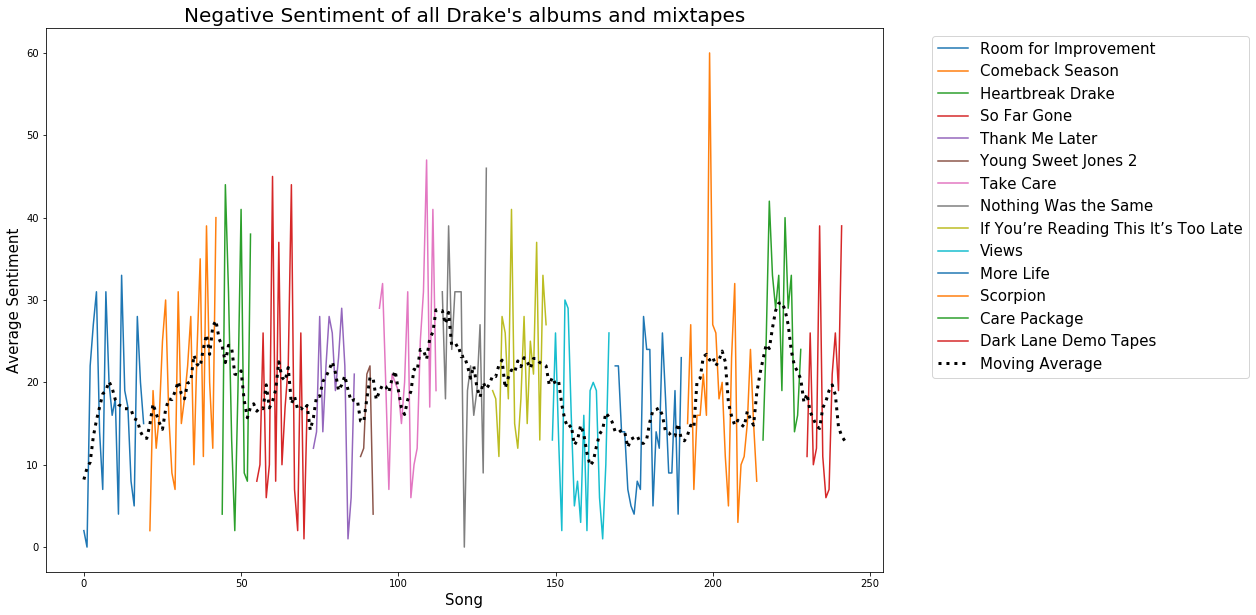

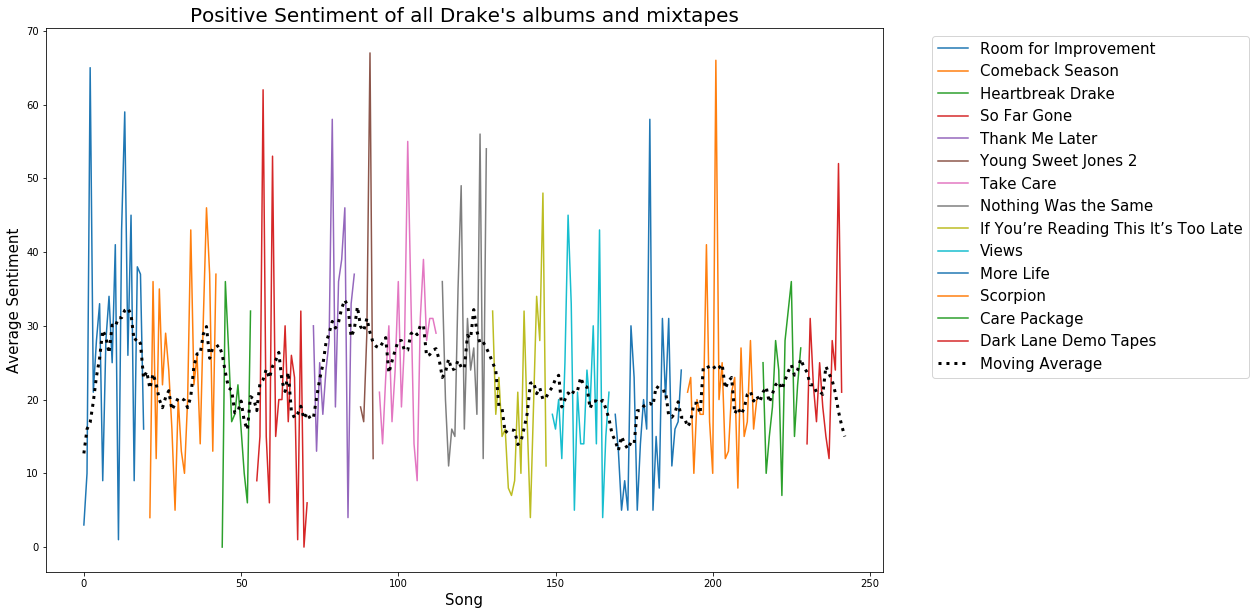

In [175]:
# Visualizing the progression of emotions throughout Drake's albums using a line plot
length = num_songs
x = np.linspace(0, length - 1, num=length)

for emotion in emotions:
    if emotion in ["positive", "negative"]:
        y = list(drake_dataset_emotions[emotion])
        plt.figure(figsize=(15, 10))
        for album in album_indices:
            plt.plot(x[album_indices[album][0]: album_indices[album][1]],
                     y[album_indices[album][0]: album_indices[album][1]],
                     label=album)
        window = 10 # Window size for moving average
        plt.plot(movingaverage(y, window), color='k', linewidth=3, linestyle=':', label='Moving Average')
        plt.legend(loc='best', fontsize=15, bbox_to_anchor=(1.05, 1))
        plt.title("{} Sentiment of all Drake's albums and mixtapes".format(emotion.title()), fontsize=20)
        plt.xlabel('Song', fontsize=15)
        plt.ylabel('Average Sentiment', fontsize=15)
        plt.show()
    else:
        continue

In [176]:
import matplotlib
tab10 = matplotlib.cm.get_cmap('tab10')

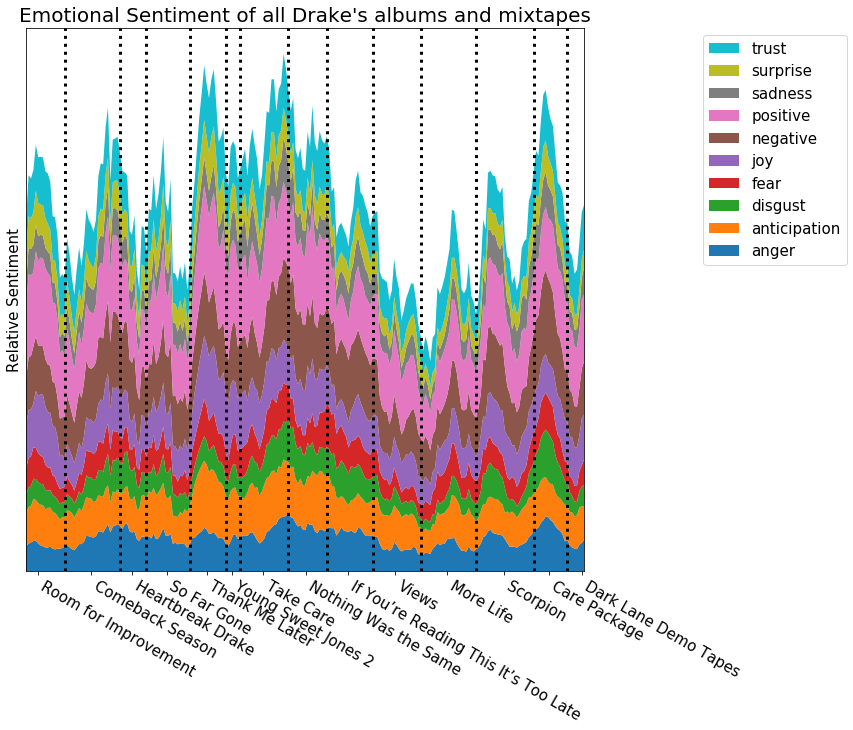

In [177]:
# Visualizing the progression of emotions throughout Drake's albums using a stacked area chart
length = num_songs
x = np.linspace(0, length - 1, num=length)
window = 10

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)


y = [movingaverage(drake_dataset_emotions[emotion].tolist(), window) for emotion in emotions]

plt.stackplot(x, y, colors=(tab10(0),
                            tab10(.1),
                            tab10(.2),
                            tab10(.3),
                            tab10(.4),
                            tab10(.5),
                            tab10(.6),
                            tab10(.7),
                            tab10(.8),
                            tab10(.9)), labels=emotions)
# Plot vertical lines marking the books
for album in album_indices:
    plt.axvline(x=album_indices[album][0], color='black', linewidth=3, linestyle=':')
plt.axvline(x=album_indices[album][1]-1, color='black', linewidth=3, linestyle=':')

plt.title("Emotional Sentiment of all Drake's albums and mixtapes", fontsize=20)
plt.xticks([(album_indices[album][0] + album_indices[album][1]) / 2 for album in album_indices],
           list(drake_dataset_emotions["album"].unique()),
           rotation=-30,
           fontsize=15,
           ha='left')
plt.yticks([])
plt.ylabel('Relative Sentiment', fontsize=15)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='best', fontsize=15, bbox_to_anchor=(1.2, 1))

axes = plt.gca()
axes.set_xlim([min(x) + window / 2, max(x) - window / 2])

ax.grid(False)

plt.show()

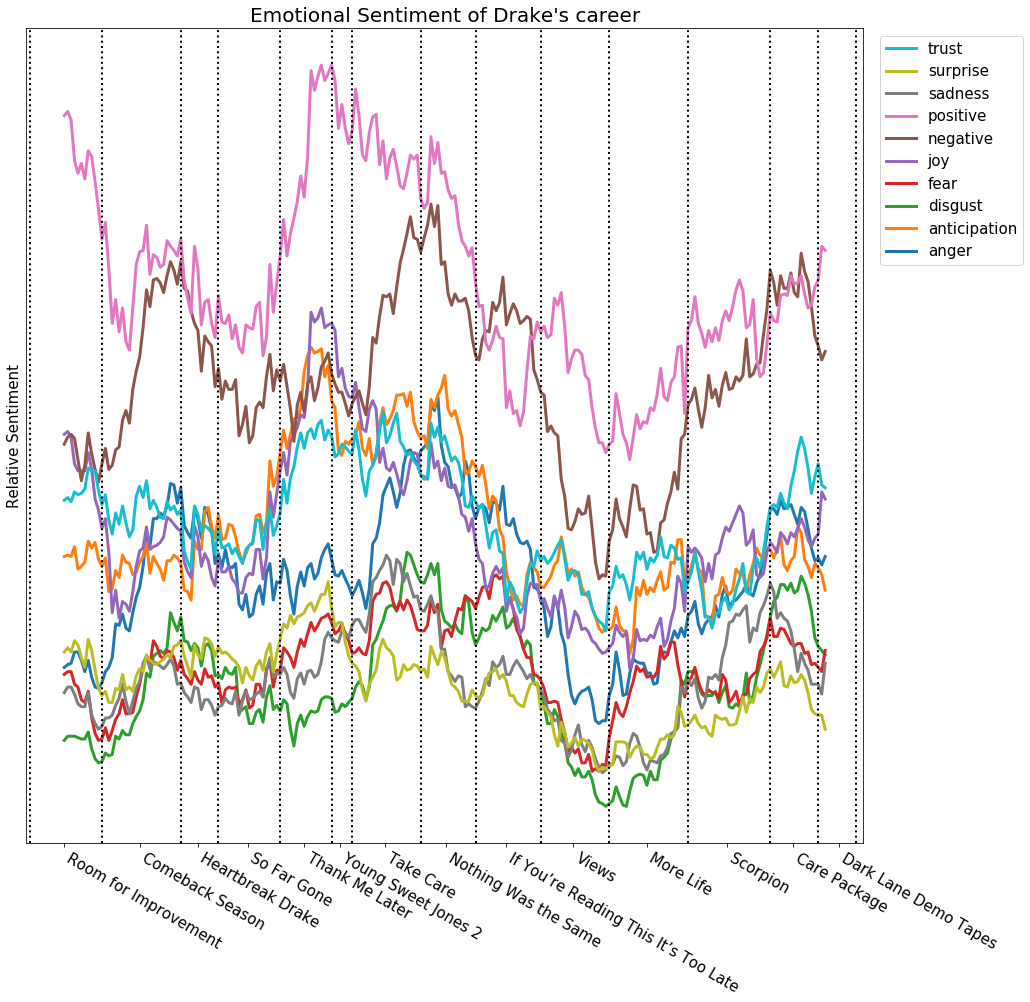

In [178]:
# Visualizing the progression of each individual emotion throughout Drakes career using a line plot
length = num_songs
window = 20
x = np.linspace(0, length - 1, num=length)[int(window / 2): -int(window / 2)]

fig = plt.figure(figsize=(15, 15))
ax =fig.add_subplot(1, 1, 1)

for c, emotion in enumerate(emotions):
    y = movingaverage(list(drake_dataset_emotions[emotion]), window)[int(window / 2): -int(window / 2)]
    plt.plot(x, y, linewidth=3, label=emotion, color=(tab10(c)))
    
# Plot vertical lines marking the books
for album in album_indices:
    plt.axvline(x=album_indices[album][0], color='black', linewidth=2, linestyle=':')
plt.axvline(x=album_indices[album][1]-1, color='black', linewidth=2, linestyle=':')

plt.legend(loc='best', fontsize=15, bbox_to_anchor=(1.2, 1))
plt.title("Emotional Sentiment of Drake's career", fontsize=20)
plt.ylabel('Relative Sentiment', fontsize=15)
plt.xticks([(album_indices[album][0] + album_indices[album][1]) / 2 for album in album_indices],
           list(drake_dataset_emotions["album"].unique()),
           rotation=-30,
           fontsize=15,
           ha='left')
plt.yticks([])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='best', fontsize=15, bbox_to_anchor=(1.2, 1))

ax.grid(False)

# axes = plt.gca()
# axes.set_xlim([min(x) + window / 2, max(x) - window / 2])

plt.show()

## 5.1. Pie Charts 

ALBUM:  Room for Improvement


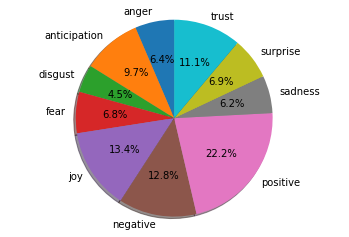

ALBUM:  Comeback Season


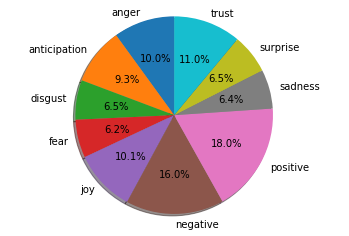

ALBUM:  Heartbreak Drake


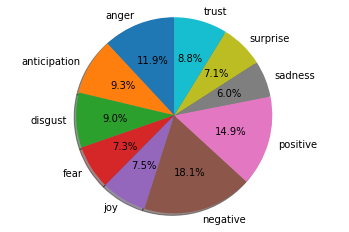

ALBUM:  So Far Gone


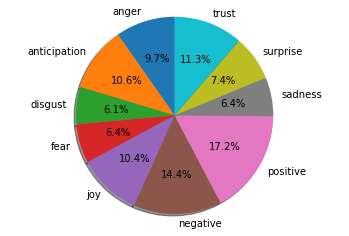

ALBUM:  Thank Me Later


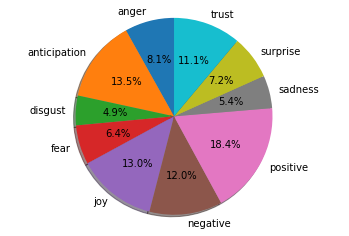

ALBUM:  Young Sweet Jones 2


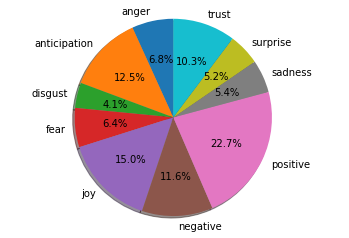

ALBUM:  Take Care


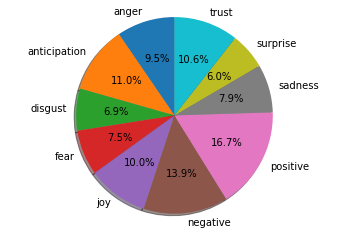

ALBUM:  Nothing Was the Same


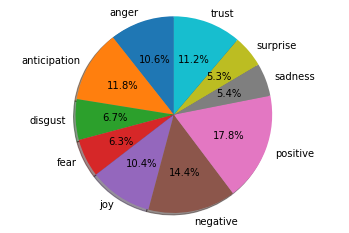

ALBUM:  If You’re Reading This It’s Too Late


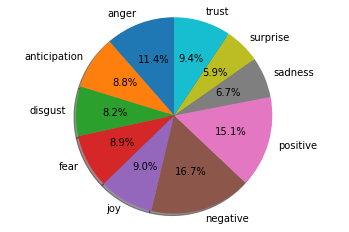

ALBUM:  Views


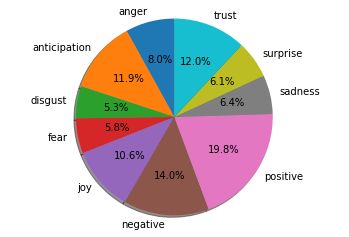

ALBUM:  More Life


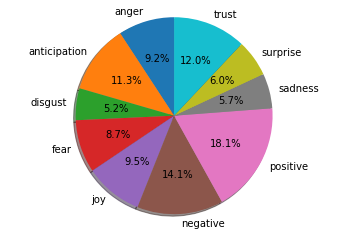

ALBUM:  Scorpion


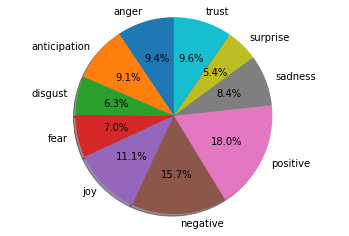

ALBUM:  Care Package


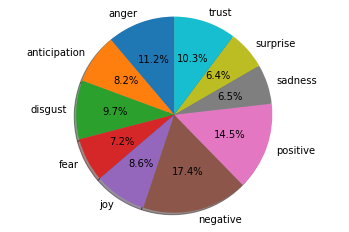

ALBUM:  Dark Lane Demo Tapes


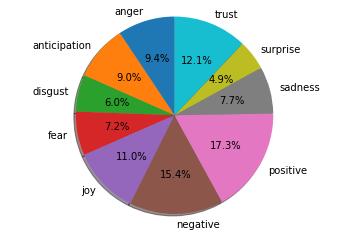

In [213]:
# Visualizing the emotional profile for all Drake's albums using pie charts
labels = emotions
sizes = []
for album in drake_dataset_emotions["album"].unique():
    print("ALBUM: ", album)
    a = drake_dataset_emotions[drake_dataset_emotions["album"] == album]
    for emotion in emotions:
        sizes.append(sum(a[emotion] * a["word_count"]))
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    sizes = []
    